## Table of Contents

### 1. Importing libraries and data
### 2. Creating subset 'private'
### 3. Removing outliers from private subset
##### 1. Average cost of attendance
##### 2. Size
##### 3. Revisit average cost of attendance
##### 4. Average net price
##### 5. Median debt
##### 6. Average family income
##### 7. Admissions rate
##### 8. Average SAT score
##### 9. Retention rate
##### 10. Percent of white students
##### 11. Fixing cost_category
### 4. Exporting private dataset

# 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [3]:
# Define path
path = r'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [4]:
# Check output
path

'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [5]:
# Import data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'scorecard_data_cleaned.pkl'))

In [6]:
# Change options to display all columns
pd.options.display.max_columns = None

In [7]:
# Check output
df.head()

,UNITID,OPEID,OPEID6,NAME,CITY,STATE,ZIP,ACCREDAGENCY,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT4_048_PUB,NPT4_048_PRIV,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NUM4_PUB,NUM4_PRIV,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,PFTFTUG1_EF,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,INC_PCT_LO,DEP_STAT_PCT_IND,DEP_INC_PCT_LO,IND_INC_PCT_LO,PAR_ED_PCT_1STGEN,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEP_INC_PCT_M1,DEP_INC_PCT_M2,DEP_INC_PCT_H1,DEP_INC_PCT_H2,IND_INC_PCT_M1,IND_INC_PCT_M2,IND_INC_PCT_H1,IND_INC_PCT_H2,PAR_ED_PCT_MS,PAR_ED_PCT_HS,PAR_ED_PCT_PS,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,DEP_INC_AVG,IND_INC_AVG,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,DEBT_N,GRAD_DEBT_N,WDRAW_DEBT_N,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N,DEP_DEBT_N,IND_DEBT_N,PELL_DEBT_N,NOPELL_DEBT_N,FEMALE_DEBT_N,MALE_DEBT_N,FIRSTGEN_DEBT_N,NOTFIRSTGEN_DEBT_N,GRAD_DEBT_MDN10YR,CUML_DEBT_N,CUML_DEBT_P90,CUML_DEBT_P75,CUML_DEBT_P25,CUML_DEBT_P10,INC_N,DEP_INC_N,IND_INC_N,DEP_STAT_N,PAR_ED_N,APPL_SCH_N,LOAN_EVER,PELL_EVER,AGE_ENTRY,AGEGE24,FEMALE,MARRIED,DEPENDENT,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,FAMINC_IND,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,ALIAS,ICLEVEL,UGDS_MEN,UGDS_WOMEN,T4APPROVALDATE,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,SCHTYPE,OPEFLAG,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,LPSTAFFORD_CNT,LPSTAFFORD_AMT,FEDSCHCD
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,3.0,0,1,1,3,4,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8986,0.8986,430.0,520.0,420.0,510.0,370.0,457.0,475.0,465.0,414.0,16.0,19.0,14.0,20.0,15.0,18.0,NaN,NaN,18.0,17.0,17.0,NaN,957.0,957.0,0.0,4990.0,0.0186,0.9120,0.0088,0.0018,0.0022,0.0016,0.0118,0.0070,0.0361,0.0587,1,14444.0,NaN,13893.0,13976.0,15995.0,18957.0,17140.0,NaN,NaN,NaN,NaN,NaN,13913.0,NaN,14684.0,NaN,18281.0,NaN,592.0,NaN,375.0,113.0,61.0,27.0,16.0,NaN,NaN,NaN,NaN,NaN,22489.0,NaN,9744.0,18354.0,NaN,7413.0,5384.0,7101.0,0.7411,0.7067,0.8987,0.6087,NaN,1.0000,NaN,0.7503,0.0758,0.602009,0.098870,0.569140,0.901587,0.365828,0.189893,0.105148,0.062147,0.040804,0.203413,NaN,NaN,NaN,0.066667,NaN,NaN,NaN,0.016422,0.349406,0.634172,0.729127,0.566855,0.457941,0.363151,34779.085684,10340.346032,15500.0,33375.0,10250.0,15500.0,16000.0,14518.0,15000.0,19000.0,17500.0,10250.0,17500.0,14250.0,15000.0,1642

In [8]:
# Get shape of dataframe
df.shape

(6806, 260)

In [9]:
# Get info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Columns: 260 entries, UNITID to FEDSCHCD
dtypes: float64(237), int64(14), object(9)
memory usage: 13.5+ MB


# 02. Creating subset 'private'

In [10]:
# Create subset of private, non-profit institutions
private = df[df['CONTROL'] == 2]

In [11]:
# Check output
private.head()

,UNITID,OPEID,OPEID6,NAME,CITY,STATE,ZIP,ACCREDAGENCY,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT4_048_PUB,NPT4_048_PRIV,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NUM4_PUB,NUM4_PRIV,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,PFTFTUG1_EF,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,INC_PCT_LO,DEP_STAT_PCT_IND,DEP_INC_PCT_LO,IND_INC_PCT_LO,PAR_ED_PCT_1STGEN,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEP_INC_PCT_M1,DEP_INC_PCT_M2,DEP_INC_PCT_H1,DEP_INC_PCT_H2,IND_INC_PCT_M1,IND_INC_PCT_M2,IND_INC_PCT_H1,IND_INC_PCT_H2,PAR_ED_PCT_MS,PAR_ED_PCT_HS,PAR_ED_PCT_PS,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,DEP_INC_AVG,IND_INC_AVG,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,DEBT_N,GRAD_DEBT_N,WDRAW_DEBT_N,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N,DEP_DEBT_N,IND_DEBT_N,PELL_DEBT_N,NOPELL_DEBT_N,FEMALE_DEBT_N,MALE_DEBT_N,FIRSTGEN_DEBT_N,NOTFIRSTGEN_DEBT_N,GRAD_DEBT_MDN10YR,CUML_DEBT_N,CUML_DEBT_P90,CUML_DEBT_P75,CUML_DEBT_P25,CUML_DEBT_P10,INC_N,DEP_INC_N,IND_INC_N,DEP_STAT_N,PAR_ED_N,APPL_SCH_N,LOAN_EVER,PELL_EVER,AGE_ENTRY,AGEGE24,FEMALE,MARRIED,DEPENDENT,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,FAMINC_IND,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,ALIAS,ICLEVEL,UGDS_MEN,UGDS_WOMEN,T4APPROVALDATE,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,SCHTYPE,OPEFLAG,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,LPSTAFFORD_CNT,LPSTAFFORD_AMT,FEDSCHCD
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,3.0,0,1,1,3,4,2,1,5,12.0,32.362609,-86.174010,20.0,5.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,351.0,0.2393,0.7151,0.0171,0.0057,0.0057,0.0000,0.0000,0.0000,0.0171,0.5014,1,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0.0,0.0,17680.0,NaN,6900.0,6900.0,NaN,14273.0,4206.0,4292.0,1.0000,0.7673,0.0035,NaN,NaN,NaN,NaN,0.8962,0.8302,0.773649,0.895270,NaN,NaN,0.512500,0.114865,0.064189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050000,0.462500,0.487500,0.594595,0.337838,0.243243,0.158784,25211.032258,20596.158491,10500.0,27334.0,9500.0,9500.0,19000.0,25000.0,7646.0,12038.0,9500.0,15509.0,9500.0,17025.0,11500.0,9500.0,514.0,92.0,422.0,397.0,91.0,26.0,60.0,454.0,464.0,50.0,327.0,187.0,458.0,56.0,283.680678,398.0,38455.0,24

In [12]:
# Check shape of private
private.shape

(2006, 260)

In [13]:
# Get info about private
private.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 2 to 6777
Columns: 260 entries, UNITID to FEDSCHCD
dtypes: float64(237), int64(14), object(9)
memory usage: 4.0+ MB


In [14]:
# Reset index for private
private = private.reset_index(drop = True)

In [15]:
# Check output
private.head()

,UNITID,OPEID,OPEID6,NAME,CITY,STATE,ZIP,ACCREDAGENCY,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT4_048_PUB,NPT4_048_PRIV,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NUM4_PUB,NUM4_PRIV,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,PFTFTUG1_EF,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,INC_PCT_LO,DEP_STAT_PCT_IND,DEP_INC_PCT_LO,IND_INC_PCT_LO,PAR_ED_PCT_1STGEN,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEP_INC_PCT_M1,DEP_INC_PCT_M2,DEP_INC_PCT_H1,DEP_INC_PCT_H2,IND_INC_PCT_M1,IND_INC_PCT_M2,IND_INC_PCT_H1,IND_INC_PCT_H2,PAR_ED_PCT_MS,PAR_ED_PCT_HS,PAR_ED_PCT_PS,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,DEP_INC_AVG,IND_INC_AVG,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,DEBT_N,GRAD_DEBT_N,WDRAW_DEBT_N,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N,DEP_DEBT_N,IND_DEBT_N,PELL_DEBT_N,NOPELL_DEBT_N,FEMALE_DEBT_N,MALE_DEBT_N,FIRSTGEN_DEBT_N,NOTFIRSTGEN_DEBT_N,GRAD_DEBT_MDN10YR,CUML_DEBT_N,CUML_DEBT_P90,CUML_DEBT_P75,CUML_DEBT_P25,CUML_DEBT_P10,INC_N,DEP_INC_N,IND_INC_N,DEP_STAT_N,PAR_ED_N,APPL_SCH_N,LOAN_EVER,PELL_EVER,AGE_ENTRY,AGEGE24,FEMALE,MARRIED,DEPENDENT,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,FAMINC_IND,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,ALIAS,ICLEVEL,UGDS_MEN,UGDS_WOMEN,T4APPROVALDATE,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,SCHTYPE,OPEFLAG,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,LPSTAFFORD_CNT,LPSTAFFORD_AMT,FEDSCHCD
0,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,3.0,0,1,1,3,4,2,1,5,12.0,32.362609,-86.174010,20.0,5.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,351.0,0.2393,0.7151,0.0171,0.0057,0.0057,0.0000,0.0000,0.0000,0.0171,0.5014,1,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,15322.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0.0,0.0,17680.0,NaN,6900.0,6900.0,NaN,14273.0,4206.0,4292.0,1.0000,0.7673,0.0035,NaN,NaN,NaN,NaN,0.8962,0.8302,0.773649,0.895270,NaN,NaN,0.512500,0.114865,0.064189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050000,0.462500,0.487500,0.594595,0.337838,0.243243,0.158784,25211.032258,20596.158491,10500.0,27334.0,9500.0,9500.0,19000.0,25000.0,7646.0,12038.0,9500.0,15509.0,9500.0,17025.0,11500.0,9500.0,514.0,92.0,422.0,397.0,91.0,26.0,60.0,454.0,464.0,50.0,327.0,187.0,458.0,56.0,283.680678,398.0,38455.0,24

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='COSTT4_A', ylabel='Density'>

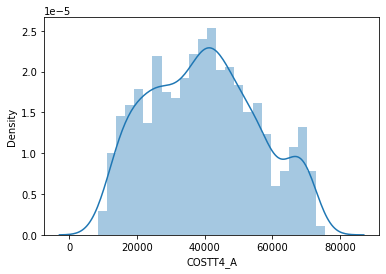

In [16]:
# Get histogram of average cost of attendance
sns.distplot(private['COSTT4_A'], bins = 25)

In [17]:
# Create lower cost category
private.loc[private['COSTT4_A'] < 20000, 'COST_CATEGORY'] = 'Lower cost'

In [18]:
# Create middle cost category
private.loc[(private['COSTT4_A'] >= 20000) & (private['COSTT4_A'] < 55000), 'COST_CATEGORY'] = 'Middle cost'

In [19]:
# Create higher cost category
private.loc[private['COSTT4_A'] >= 55000, 'COST_CATEGORY'] = 'Higher cost'

In [20]:
# Get value counts of COST_CATEGORY column
private['COST_CATEGORY'].value_counts(dropna = False)

Middle cost    941
NaN            630
Higher cost    258
Lower cost     177
Name: COST_CATEGORY, dtype: int64

In [21]:
# Keep specific columns for subset of private institutions
private = private[['UNITID', 'NAME', 'CITY', 'STATE', 'ZIP', 'REGION', 'LOCALE', 'COSTT4_A', 'NPT4_PRIV', 'DEBT_MDN', 'FAMINC', 'ADM_RATE', 'SAT_AVG', 'UGDS', 'RET_FT4_POOLED', 'UGDS_WHITE', 'COST_CATEGORY']]

In [22]:
# Check output
private.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100690,Amridge University,Montgomery,AL,36117-3553,5,12.0,17680.0,15322.0,10500.0,21079.472973,NaN,NaN,351.0,0.2143,0.2393,Lower cost
1,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost
2,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost
3,101365,Herzing University-Birmingham,Birmingham,AL,35209,5,21.0,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813,Middle cost
4,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost


In [23]:
# Check shape
private.shape

(2006, 17)

In [24]:
# Get info
private.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNITID          2006 non-null   int64  
 1   NAME            2006 non-null   object 
 2   CITY            2006 non-null   object 
 3   STATE           2006 non-null   object 
 4   ZIP             2006 non-null   object 
 5   REGION          2006 non-null   int64  
 6   LOCALE          1859 non-null   float64
 7   COSTT4_A        1376 non-null   float64
 8   NPT4_PRIV       1453 non-null   float64
 9   DEBT_MDN        1549 non-null   float64
 10  FAMINC          1661 non-null   float64
 11  ADM_RATE        1190 non-null   float64
 12  SAT_AVG         783 non-null    float64
 13  UGDS            1620 non-null   float64
 14  RET_FT4_POOLED  1306 non-null   float64
 15  UGDS_WHITE      1620 non-null   float64
 16  COST_CATEGORY   1376 non-null   object 
dtypes: float64(10), int64(2), object(

# 03. Removing outliers from private subset

## 01. Average cost of attendance

In [25]:
# Get number of missing values for average cost of attendance
private['COSTT4_A'].isnull().sum()

630

In [26]:
# Get list of rows with missing cost values
private[private['COSTT4_A'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
5,101453,Heritage Christian University,Florence,AL,35630-9977,5,13.0,NaN,NaN,NaN,33173.640000,NaN,NaN,49.0,0.7647,0.7551,NaN
16,102395,United States Sports Academy,Daphne,AL,36526-7055,5,13.0,NaN,NaN,13078.0,36311.690141,NaN,NaN,266.0,NaN,0.6165,NaN
21,104665,School of Architecture at Taliesin,Scottsdale,AZ,85259,6,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,105367,Ottawa University-Phoenix,Phoenix,AZ,85021,6,11.0,NaN,NaN,12000.0,49555.756863,NaN,NaN,340.0,NaN,0.5588,NaN
32,107123,Jefferson Regional Medical Center School of Nu...,Pine Bluff,AR,71603,5,13.0,NaN,NaN,7493.0,40192.127907,NaN,NaN,70.0,NaN,0.7571,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,47503312,Relay Graduate School of Education - Dallas-Fo...,Dallas,TX,75232,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,47503313,Relay Graduate School of Education - Washingto...,Washington,DC,20002,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,47503314,Relay Graduate School of Education - Atlanta,Atlanta,GA,30345,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,47503315,Relay Graduate School of Education - California,San Jose,CA,951103719,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Change options to display all rows
pd.options.display.max_rows = None

In [28]:
# Get list of rows with missing cost values
private[private['COSTT4_A'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
5,101453,Heritage Christian University,Florence,AL,35630-9977,5,13.0,NaN,NaN,NaN,33173.640000,NaN,NaN,49.0,0.7647,0.7551,NaN
16,102395,United States Sports Academy,Daphne,AL,36526-7055,5,13.0,NaN,NaN,13078.0,36311.690141,NaN,NaN,266.0,NaN,0.6165,NaN
21,104665,School of Architecture at Taliesin,Scottsdale,AZ,85259,6,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,105367,Ottawa University-Phoenix,Phoenix,AZ,85021,6,11.0,NaN,NaN,12000.0,49555.756863,NaN,NaN,340.0,NaN,0.5588,NaN
32,107123,Jefferson Regional Medical Center School of Nu...,Pine Bluff,AR,71603,5,13.0,NaN,NaN,7493.0,40192.127907,NaN,NaN,70.0,NaN,0.7571,NaN
39,108269,Academy of Chinese Culture and Health Sciences,Oakland,CA,94612,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,108861,American Baptist Seminary of the West,Berkeley,CA,94704-3029,8,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,108870,American Film Institute Conservatory,Los Angeles,CA,90027-1625,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,110316,California Institute of Integral Studies,San Francisco,CA,94103,8,11.0,NaN,NaN,18750.0,26409.270588,NaN,NaN,61.0,NaN,0.5246,NaN
55,111391,California Western School of Law,San Diego,CA,92101-3046,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Get rows with missing values for all continuous variables
private_null = private[private['COSTT4_A'].isnull() & private['DEBT_MDN'].isnull() & private['FAMINC'].isnull() & private['ADM_RATE'].isnull() & private['SAT_AVG'].isnull() & private['UGDS'].isnull() & private['RET_FT4_POOLED'].isnull() & private['UGDS_WHITE'].isnull()]

In [30]:
# Check output
private_null

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
21,104665,School of Architecture at Taliesin,Scottsdale,AZ,85259,6,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,108269,Academy of Chinese Culture and Health Sciences,Oakland,CA,94612,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,108861,American Baptist Seminary of the West,Berkeley,CA,94704-3029,8,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,108870,American Film Institute Conservatory,Los Angeles,CA,90027-1625,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,111391,California Western School of Law,San Diego,CA,92101-3046,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,112127,Church Divinity School of the Pacific,Berkeley,CA,94709-1211,8,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,112525,Western University of Health Sciences,Pomona,CA,91766-1854,8,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,113704,Dominican School of Philosophy & Theology,Berkeley,CA,94708-1816,8,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,114549,Fielding Graduate University,Santa Barbara,CA,93105-3538,8,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,114734,Franciscan School of Theology,Oceanside,CA,92057,8,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Get shape
private_null.shape

(233, 17)

In [32]:
# Remove rows with missing values for all continuous variables
private = private.dropna(subset = ['COSTT4_A', 'NPT4_PRIV', 'DEBT_MDN', 'FAMINC', 'ADM_RATE', 'SAT_AVG', 'UGDS', 'RET_FT4_POOLED', 'UGDS_WHITE'], how = 'all')

In [33]:
# Check new shape
private.shape

(1773, 17)

In [34]:
# Try getting number of missing values for average cost of attendance again
private['COSTT4_A'].isnull().sum()

397

In [35]:
# Look at private institutions with missing values for cost
private[private['COSTT4_A'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
5,101453,Heritage Christian University,Florence,AL,35630-9977,5,13.0,NaN,NaN,NaN,33173.640000,NaN,NaN,49.0,0.7647,0.7551,NaN
16,102395,United States Sports Academy,Daphne,AL,36526-7055,5,13.0,NaN,NaN,13078.0,36311.690141,NaN,NaN,266.0,NaN,0.6165,NaN
22,105367,Ottawa University-Phoenix,Phoenix,AZ,85021,6,11.0,NaN,NaN,12000.0,49555.756863,NaN,NaN,340.0,NaN,0.5588,NaN
32,107123,Jefferson Regional Medical Center School of Nu...,Pine Bluff,AR,71603,5,13.0,NaN,NaN,7493.0,40192.127907,NaN,NaN,70.0,NaN,0.7571,NaN
48,110316,California Institute of Integral Studies,San Francisco,CA,94103,8,11.0,NaN,NaN,18750.0,26409.270588,NaN,NaN,61.0,NaN,0.5246,NaN
56,111638,Casa Loma College-Van Nuys,Van Nuys,CA,91405,8,11.0,NaN,24738.0,19500.0,37061.255556,0.9130,NaN,175.0,NaN,0.3714,NaN
57,111708,CET-San Diego,San Diego,CA,92102,8,11.0,NaN,17178.0,5894.0,17278.963278,NaN,NaN,174.0,NaN,0.1379,NaN
58,111717,CET-San Jose,San Jose,CA,95110,8,11.0,NaN,14728.0,5894.0,17278.963278,NaN,NaN,248.0,NaN,0.0524,NaN
59,111726,CET-El Centro,El Centro,CA,92243,8,13.0,NaN,6916.0,5894.0,17278.963278,NaN,NaN,230.0,NaN,0.0174,NaN
60,111744,CET-Colton,Colton,CA,92324,8,21.0,NaN,14146.0,5894.0,17278.963278,NaN,NaN,154.0,NaN,0.1039,NaN


A number of these schools with missing values have extremely small numbers of students. I have a feeling that there will be a lot of outliers where size is too small and the observations will be removed. I will ignore the missing cost values for now, and revisit after looking at the size variable.

## 02. Size

In [36]:
# Get number of missing values for size
private['UGDS'].isnull().sum()

153

In [37]:
# Show schools with missing values for size
private[private['UGDS'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
68,112251,Claremont Graduate University,Claremont,CA,91711-6160,8,21.0,NaN,NaN,NaN,45627.685714,NaN,NaN,NaN,NaN,NaN,NaN
133,123448,Trinity Law School,Santa Ana,CA,92705,8,11.0,NaN,NaN,16000.0,57731.865613,NaN,NaN,NaN,NaN,NaN,NaN
136,123633,South Baylo University,Anaheim,CA,92801-1701,8,11.0,NaN,NaN,12905.0,25177.652174,NaN,NaN,NaN,NaN,NaN,NaN
143,123970,Southwestern Law School,Los Angeles,CA,90010-1106,8,11.0,NaN,NaN,NaN,34549.636364,NaN,NaN,NaN,NaN,NaN,NaN
172,129428,Rensselaer at Hartford,Hartford,CT,06120,1,12.0,NaN,NaN,22258.0,112386.823080,NaN,NaN,NaN,NaN,NaN,NaN
287,143978,The Chicago School of Professional Psychology ...,Chicago,IL,60654,3,11.0,NaN,NaN,6497.0,31396.256158,NaN,NaN,NaN,NaN,NaN,NaN
300,145558,Rosalind Franklin University of Medicine and S...,North Chicago,IL,60064-3095,3,21.0,NaN,NaN,NaN,17419.757576,NaN,NaN,NaN,NaN,NaN,NaN
451,156222,Asbury Theological Seminary,Wilmore,KY,40390-1199,5,31.0,NaN,NaN,NaN,20415.594595,NaN,NaN,NaN,NaN,NaN,NaN
610,170842,Marygrove College,Detroit,MI,48221-2599,3,11.0,NaN,NaN,26750.0,32852.085714,NaN,NaN,NaN,0.3051,NaN,NaN
627,173179,Bethel Seminary-St Paul,Saint Paul,MN,55112,4,21.0,NaN,NaN,17250.0,93140.148627,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Remove rows where size is missing
private = private[private['UGDS'].isnull() == False]

In [39]:
# Check new shape
private.shape

(1620, 17)

In [40]:
# Check for rows with 0 students
private[private['UGDS'] == 0]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
43,109086,American Conservatory Theater,San Francisco,CA,94108-5834,8,11.0,49581.0,28411.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Middle cost
120,122117,Dongguk University-Los Angeles,Los Angeles,CA,90020-1704,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1077,210438,University of Western States,Portland,OR,97230-3099,8,11.0,NaN,NaN,8001.0,20683.818182,NaN,NaN,0.0,NaN,0.0,NaN
1252,219842,Pentecostal Theological Seminary,Cleveland,TN,37320-3330,5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1488,260947,Christian Life College,Mount Prospect,IL,60056-2522,3,21.0,NaN,NaN,NaN,38127.200000,NaN,NaN,0.0,0.7143,0.0,NaN
1491,262165,Montana Bible College,Bozeman,MT,59718,7,41.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1604,440411,Marlboro College Graduate & Professional Studies,Marlboro,VT,05344,1,42.0,NaN,NaN,19472.0,75768.773585,NaN,NaN,0.0,NaN,0.0,NaN
1672,449834,Virginia Beach Theological Seminary,Virginia Beach,VA,23464-6847,5,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1721,460075,California University of Management and Sciences,Anaheim,CA,92801,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.3750,0.0,NaN
1783,484303,Montessori Education Institute of the Pacific ...,Bothell,WA,98011-8005,8,21.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [41]:
# Remove rows with 0 students
private = private[private['UGDS'] != 0]

In [42]:
# Check shape
private.shape

(1610, 17)

<AxesSubplot:xlabel='UGDS'>

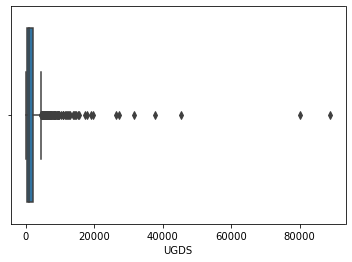

In [43]:
# Get boxplot
sns.boxplot(x = private['UGDS'])

In [44]:
# Get descriptive stats
private['UGDS'].describe()

count     1610.000000
mean      1739.993789
std       4078.340454
min          4.000000
25%        214.000000
50%        875.000000
75%       1936.250000
max      88921.000000
Name: UGDS, dtype: float64

In [45]:
# Show schools with size over 3 st. dev. away
private[private['UGDS'] >= (private['UGDS'].median() + private['UGDS'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
142,123961,University of Southern California,Los Angeles,CA,90089,8,11.0,72097.0,30453.0,17750.0,80335.792160,0.1296,1445.0,19548.0,0.9656,0.3922,Higher cost
215,135081,Keiser University-Ft Lauderdale,Fort Lauderdale,FL,33309,5,12.0,36356.0,30767.0,13000.0,30044.945738,NaN,NaN,17813.0,0.8553,0.3330,Middle cost
273,142522,Brigham Young University-Idaho,Rexburg,ID,83460-1690,7,32.0,12223.0,7632.0,8456.0,52778.436134,0.9717,1140.0,37636.0,0.7294,0.7247,Lower cost
292,144740,DePaul University,Chicago,IL,60604,3,11.0,54439.0,28410.0,19780.0,74921.306181,0.6753,NaN,14280.0,0.8475,0.5244,Middle cost
527,164988,Boston University,Boston,MA,02215,1,11.0,70216.0,30729.0,22250.0,105821.886000,0.2209,1420.0,17238.0,0.9375,0.3741,Higher cost
566,167358,Northeastern University,Boston,MA,02115-5005,1,11.0,67894.0,31855.0,23000.0,105958.146350,0.1934,1466.0,13760.0,0.9666,0.4523,Higher cost
741,183026,Southern New Hampshire University,Manchester,NH,03106-1045,1,22.0,49092.0,40334.0,8710.0,37912.992529,0.7282,NaN,80170.0,0.6327,0.6111,Middle cost
807,190415,Cornell University,Ithaca,NY,14853,2,13.0,70301.0,30494.0,13500.0,96568.987435,0.1061,1471.0,15105.0,0.9724,0.3652,Higher cost
866,193900,New York University,New York,NY,10012-1091,2,11.0,69830.0,42397.0,19000.0,89356.555851,0.1999,1419.0,26339.0,0.9373,0.2805,Higher cost
906,196413,Syracuse University,Syracuse,NY,13244,2,12.0,65295.0,34472.0,24526.0,106971.907390,0.4986,1284.0,14759.0,0.9056,0.5672,Higher cost


In [46]:
# Show schools with over 20000 students
private[private['UGDS'] >= 20000]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
273,142522,Brigham Young University-Idaho,Rexburg,ID,83460-1690,7,32.0,12223.0,7632.0,8456.0,52778.436134,0.9717,1140.0,37636.0,0.7294,0.7247,Lower cost
741,183026,Southern New Hampshire University,Manchester,NH,03106-1045,1,22.0,49092.0,40334.0,8710.0,37912.992529,0.7282,NaN,80170.0,0.6327,0.6111,Middle cost
866,193900,New York University,New York,NY,10012-1091,2,11.0,69830.0,42397.0,19000.0,89356.555851,0.1999,1419.0,26339.0,0.9373,0.2805,Higher cost
913,196680,Excelsior College,Albany,NY,12203-5159,2,13.0,NaN,NaN,10417.0,43950.683367,NaN,NaN,27207.0,NaN,0.6083,NaN
1334,230038,Brigham Young University-Provo,Provo,UT,84602,7,12.0,18136.0,13181.0,8750.0,59069.908336,0.6447,1324.0,31441.0,0.8900,0.8141,Lower cost
1364,232557,Liberty University,Lynchburg,VA,24515,5,13.0,38076.0,27883.0,16790.0,45801.487319,0.5554,1133.0,45370.0,0.8288,0.5219,Middle cost
1572,433387,Western Governors University,Salt Lake City,UT,84107,7,21.0,NaN,NaN,8642.0,54991.123106,NaN,NaN,88921.0,0.7459,0.7015,NaN


In [47]:
# Remove schools with more than 20000 students
private = private[private['UGDS'] < 20000]

In [48]:
# Check new shape
private.shape

(1603, 17)

## 03. Revisit average cost of attendance

In [49]:
# Get number of missing values for average cost
private['COSTT4_A'].isnull().sum()

233

In [50]:
# Look at private institutions with missing values for cost
private[private['COSTT4_A'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
5,101453,Heritage Christian University,Florence,AL,35630-9977,5,13.0,NaN,NaN,NaN,33173.640000,NaN,NaN,49.0,0.7647,0.7551,NaN
16,102395,United States Sports Academy,Daphne,AL,36526-7055,5,13.0,NaN,NaN,13078.0,36311.690141,NaN,NaN,266.0,NaN,0.6165,NaN
22,105367,Ottawa University-Phoenix,Phoenix,AZ,85021,6,11.0,NaN,NaN,12000.0,49555.756863,NaN,NaN,340.0,NaN,0.5588,NaN
32,107123,Jefferson Regional Medical Center School of Nu...,Pine Bluff,AR,71603,5,13.0,NaN,NaN,7493.0,40192.127907,NaN,NaN,70.0,NaN,0.7571,NaN
48,110316,California Institute of Integral Studies,San Francisco,CA,94103,8,11.0,NaN,NaN,18750.0,26409.270588,NaN,NaN,61.0,NaN,0.5246,NaN
56,111638,Casa Loma College-Van Nuys,Van Nuys,CA,91405,8,11.0,NaN,24738.0,19500.0,37061.255556,0.9130,NaN,175.0,NaN,0.3714,NaN
57,111708,CET-San Diego,San Diego,CA,92102,8,11.0,NaN,17178.0,5894.0,17278.963278,NaN,NaN,174.0,NaN,0.1379,NaN
58,111717,CET-San Jose,San Jose,CA,95110,8,11.0,NaN,14728.0,5894.0,17278.963278,NaN,NaN,248.0,NaN,0.0524,NaN
59,111726,CET-El Centro,El Centro,CA,92243,8,13.0,NaN,6916.0,5894.0,17278.963278,NaN,NaN,230.0,NaN,0.0174,NaN
60,111744,CET-Colton,Colton,CA,92324,8,21.0,NaN,14146.0,5894.0,17278.963278,NaN,NaN,154.0,NaN,0.1039,NaN


In [51]:
# Look at descriptive stats
private['COSTT4_A'].describe()

count     1370.000000
mean     39744.319708
std      16023.048668
min       8415.000000
25%      26822.750000
50%      39509.000000
75%      51007.000000
max      75735.000000
Name: COSTT4_A, dtype: float64

In [52]:
# Find number of schools where number of students is under 50
(private['UGDS'] < 50).sum()

115

In [53]:
# Find schools where number students under 50 and missing cost info
priv_50_cost = private[(private['COSTT4_A'].isnull()) & (private['UGDS'] < 50)]

In [54]:
# Get output
priv_50_cost

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
5,101453,Heritage Christian University,Florence,AL,35630-9977,5,13.0,NaN,NaN,NaN,33173.640000,NaN,NaN,49.0,0.7647,0.7551,NaN
72,113537,Dell'Arte International School of Physical The...,Blue Lake,CA,95525-0816,8,41.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,0.5000,NaN
101,119058,Middlebury Institute of International Studies ...,Monterey,CA,93940,8,22.0,NaN,NaN,12503.0,94718.951763,NaN,NaN,5.0,NaN,0.6000,NaN
111,120838,Pacific States University,Los Angeles,CA,90010-2263,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0000,0.0000,NaN
163,127787,Altierus Career College-Thornton,Thornton,CO,80229-4339,7,21.0,NaN,NaN,9361.0,26384.558824,NaN,NaN,7.0,NaN,0.0000,NaN
165,127954,Montessori Education Center of the Rockies,Boulder,CO,80301,7,12.0,NaN,13327.0,9500.0,45367.729730,0.9375,NaN,17.0,NaN,0.8824,NaN
276,142957,American Islamic College,Chicago,IL,60613,3,11.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.7500,0.2222,NaN
283,143303,Blessing Hospital School of Radiologic Technology,Quincy,IL,62305-7005,3,33.0,NaN,NaN,13798.0,55160.453901,NaN,NaN,19.0,NaN,0.3684,NaN
297,145354,Graham Hospital School of Nursing,Canton,IL,61520-2497,3,32.0,NaN,NaN,11341.0,47840.058824,1.0000,NaN,39.0,NaN,0.9487,NaN
349,148955,National Latino Education Institute,Chicago,IL,60609-2205,3,11.0,NaN,11057.0,NaN,25631.432836,0.6364,NaN,13.0,NaN,0.0000,NaN


In [55]:
# Get shape
priv_50_cost.shape

(63, 17)

In [56]:
# Create list of UNITID from priv_50_cost
list_unitid = priv_50_cost['UNITID'].to_list()

In [57]:
# Check output
list_unitid

[101453,
 113537,
 119058,
 120838,
 127787,
 127954,
 142957,
 143303,
 145354,
 148955,
 153542,
 166045,
 166717,
 167677,
 172927,
 181145,
 183600,
 186405,
 190707,
 192800,
 192970,
 206154,
 209296,
 219170,
 219338,
 219392,
 233480,
 237145,
 237905,
 245777,
 245892,
 247162,
 247825,
 364122,
 366571,
 404718,
 407629,
 411754,
 430306,
 433165,
 434362,
 437705,
 439446,
 442949,
 446394,
 451033,
 455220,
 457226,
 458113,
 461643,
 475705,
 480499,
 480727,
 481225,
 485360,
 487816,
 488004,
 488086,
 490045,
 490328,
 490498,
 491589,
 491659]

In [58]:
# Remove rows with unit id in list_unitid from private
private = private[~private['UNITID'].isin(list_unitid)]

In [59]:
# Check new shape
private.shape

(1540, 17)

In [60]:
# Now get number of missing values for cost
private['COSTT4_A'].isnull().sum()

170

In [61]:
# Get descriptive stats for average cost
private['COSTT4_A'].describe()

count     1370.000000
mean     39744.319708
std      16023.048668
min       8415.000000
25%      26822.750000
50%      39509.000000
75%      51007.000000
max      75735.000000
Name: COSTT4_A, dtype: float64

In [62]:
# Impute median for rows with missing cost values
private['COSTT4_A'].fillna(39509, inplace = True)

In [63]:
# Check no missing values left
private['COSTT4_A'].isnull().sum()

0

In [64]:
# Check descriptive stats
private['COSTT4_A'].describe()

count     1540.000000
mean     39718.342857
std      15112.375634
min       8415.000000
25%      28343.750000
50%      39509.000000
75%      49452.750000
max      75735.000000
Name: COSTT4_A, dtype: float64

In [65]:
# Get shape
private.shape

(1540, 17)

<AxesSubplot:xlabel='COSTT4_A'>

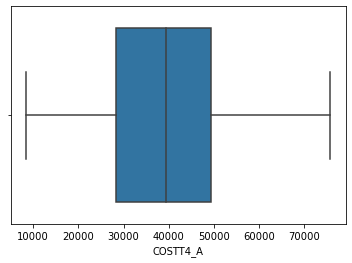

In [66]:
# Get boxplot
sns.boxplot(x = private['COSTT4_A'])

## 04. Average net price

In [67]:
# Get number of missing values for average net price
private['NPT4_PRIV'].isnull().sum()

110

In [68]:
# Look at rows with missing values
private[private['NPT4_PRIV'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
16,102395,United States Sports Academy,Daphne,AL,36526-7055,5,13.0,39509.0,NaN,13078.0,36311.690141,NaN,NaN,266.0,NaN,0.6165,NaN
22,105367,Ottawa University-Phoenix,Phoenix,AZ,85021,6,11.0,39509.0,NaN,12000.0,49555.756863,NaN,NaN,340.0,NaN,0.5588,NaN
32,107123,Jefferson Regional Medical Center School of Nu...,Pine Bluff,AR,71603,5,13.0,39509.0,NaN,7493.0,40192.127907,NaN,NaN,70.0,NaN,0.7571,NaN
48,110316,California Institute of Integral Studies,San Francisco,CA,94103,8,11.0,39509.0,NaN,18750.0,26409.270588,NaN,NaN,61.0,NaN,0.5246,NaN
80,115083,Golden Gate University-San Francisco,San Francisco,CA,94105-2968,8,11.0,39509.0,NaN,25000.0,45571.152047,NaN,NaN,404.0,NaN,0.2797,NaN
85,116712,John F. Kennedy University,Pleasant Hill,CA,94523-4817,8,21.0,39509.0,NaN,18055.0,35941.785714,NaN,NaN,209.0,NaN,0.3541,NaN
92,117575,Southern California Seminary,El Cajon,CA,92019-1108,8,21.0,39509.0,NaN,9330.0,28258.740741,NaN,NaN,50.0,0.6000,0.5600,NaN
94,117636,Loma Linda University,Loma Linda,CA,92350,8,21.0,39509.0,NaN,19250.0,51357.700813,NaN,NaN,1052.0,NaN,0.2728,NaN
103,119605,National University,La Jolla,CA,92037-1011,8,11.0,39509.0,NaN,18750.0,42447.176471,NaN,NaN,7097.0,0.6692,0.3408,NaN
108,120698,Palo Alto University,Palo Alto,CA,94304-1337,8,41.0,39509.0,NaN,20000.0,27964.925000,NaN,NaN,102.0,NaN,0.1765,NaN


In [69]:
# Get descriptive stats
private['NPT4_PRIV'].describe()

count     1430.000000
mean     21559.223776
std       8225.223681
min      -1338.000000
25%      16872.500000
50%      21417.000000
75%      26175.000000
max      50794.000000
Name: NPT4_PRIV, dtype: float64

In [70]:
# Remove rows where average net price is below 0
private = private[private['NPT4_PRIV'] >= 0]

In [71]:
# Get new shape
private.shape

(1429, 17)

In [72]:
# Get new descriptive stats
private['NPT4_PRIV'].describe()

count     1429.000000
mean     21575.247026
std       8205.746754
min       1466.000000
25%      16934.000000
50%      21421.000000
75%      26180.000000
max      50794.000000
Name: NPT4_PRIV, dtype: float64

In [73]:
# Impute median for missing values
private['NPT4_PRIV'].fillna(21421, inplace = True)

In [74]:
# Check no missing values left
private['NPT4_PRIV'].isnull().sum()

0

<AxesSubplot:xlabel='NPT4_PRIV'>

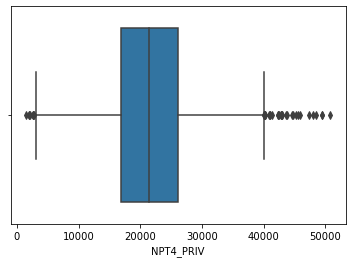

In [75]:
# Get boxplot
sns.boxplot(x = private['NPT4_PRIV'])

In [76]:
# Get IQR
IQR = private['NPT4_PRIV'].quantile(0.75) - private['NPT4_PRIV'].quantile(0.25)

In [77]:
# Show low outliers
private[private['NPT4_PRIV'] < (private['NPT4_PRIV'].quantile(0.25) - 1.5*IQR)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
453,156295,Berea College,Berea,KY,40404-2182,5,32.0,35394.0,1964.0,4242.0,26326.125444,0.3820,1192.0,1630.0,0.8176,0.5387,Middle cost
833,192165,Kehilath Yakov Rabbinical Seminary,Ossining,NY,10562,2,41.0,14125.0,2551.0,NaN,20196.283582,NaN,NaN,159.0,0.9425,1.0000,Lower cost
908,196440,Talmudical Institute of Upstate New York,Rochester,NY,14607-3046,2,12.0,11600.0,1937.0,NaN,NaN,NaN,NaN,6.0,0.6667,1.0000,Lower cost
1445,241386,Caribbean University-Carolina,Carolina,PR,00985,9,21.0,8981.0,2854.0,6000.0,11130.437104,NaN,NaN,288.0,0.6774,0.0000,Lower cost
1496,363916,Caribbean University-Vega Baja,Vega Baja,PR,00964,9,21.0,8415.0,2647.0,6000.0,11130.437104,NaN,NaN,200.0,0.6774,0.0000,Lower cost
1681,451398,Yeshiva Toras Chaim,Lakewood,NJ,08701,2,21.0,18693.0,2207.0,NaN,32881.712121,0.6237,NaN,240.0,0.9734,0.9375,Lower cost
1682,451404,Talmudical Seminary of Bobov,Brooklyn,NY,11219,2,11.0,13400.0,2535.0,NaN,19572.210169,0.9545,NaN,395.0,0.5902,1.0000,Lower cost
1756,476717,Be'er Yaakov Talmudic Seminary,Spring Valley,NY,10977-1912,2,21.0,15750.0,1466.0,NaN,19820.801418,NaN,NaN,569.0,0.9460,0.9982,Lower cost


In [78]:
# Show low outliers by 3 st. dev. away
private[private['NPT4_PRIV'] < (private['NPT4_PRIV'].median() - private['NPT4_PRIV'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY


In [79]:
# Show high outliers
private[private['NPT4_PRIV'] > (private['NPT4_PRIV'].quantile(0.75) + 1.5*IQR)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
44,109651,Art Center College of Design,Pasadena,CA,91103,8,12.0,64097.0,43010.0,27811.0,51484.238267,0.6765,NaN,1987.0,0.8116,0.1369,Higher cost
54,111081,California Institute of the Arts,Valencia,CA,91355-2397,8,21.0,69015.0,47921.0,24326.0,90561.135762,0.2297,NaN,1003.0,0.8060,0.4257,Higher cost
63,111948,Chapman University,Orange,CA,92866,8,12.0,69018.0,40251.0,19000.0,105779.203690,0.5356,1288.0,7026.0,0.9010,0.5282,Higher cost
106,120403,Otis College of Art and Design,Los Angeles,CA,90045-3505,8,11.0,61776.0,42253.0,22500.0,61810.607784,0.9441,1158.0,1080.0,0.7857,0.2907,Higher cost
123,122454,San Francisco Art Institute,San Francisco,CA,94133-2299,8,11.0,69525.0,45203.0,18250.0,63636.275641,0.9487,NaN,271.0,0.5446,0.3838,Higher cost
141,123952,Southern California Institute of Architecture,Los Angeles,CA,90013-1822,8,11.0,67638.0,47287.0,31000.0,38699.322581,NaN,NaN,249.0,0.7692,0.1365,Higher cost
179,130253,Sacred Heart University,Fairfield,CT,06825-1000,1,21.0,57542.0,41066.0,20500.0,122875.424370,0.6044,NaN,5907.0,0.8343,0.7220,Higher cost
222,136774,Ringling College of Art and Design,Sarasota,FL,34234-5895,5,13.0,64554.0,49515.0,27000.0,73385.200758,0.6691,NaN,1559.0,0.8247,0.4670,Higher cost
254,140553,Morehouse College,Atlanta,GA,30314,5,11.0,48350.0,40068.0,15976.0,64861.720830,0.5788,1120.0,2205.0,0.7935,0.0032,Middle cost
260,140951,Savannah College of Art and Design,Savannah,GA,31402-3146,5,12.0,55793.0,42355.0,17000.0,86153.582365,0.7027,1157.0,11363.0,0.8375,0.5441,Higher cost


In [80]:
# Show high outliers by 3 st. dev. away
private[private['NPT4_PRIV'] > (private['NPT4_PRIV'].median() + private['NPT4_PRIV'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
54,111081,California Institute of the Arts,Valencia,CA,91355-2397,8,21.0,69015.0,47921.0,24326.0,90561.135762,0.2297,NaN,1003.0,0.8060,0.4257,Higher cost
141,123952,Southern California Institute of Architecture,Los Angeles,CA,90013-1822,8,11.0,67638.0,47287.0,31000.0,38699.322581,NaN,NaN,249.0,0.7692,0.1365,Higher cost
222,136774,Ringling College of Art and Design,Sarasota,FL,34234-5895,5,13.0,64554.0,49515.0,27000.0,73385.200758,0.6691,NaN,1559.0,0.8247,0.4670,Higher cost
523,164748,Berklee College of Music,Boston,MA,02215,1,11.0,63027.0,48425.0,15374.0,78637.270005,0.4764,NaN,6332.0,0.8456,0.4346,Higher cost
552,166489,Longy School of Music of Bard College,Cambridge,MA,02138,1,12.0,55170.0,49433.0,20500.0,83934.442879,0.9063,NaN,36.0,0.6818,0.3333,Higher cost
831,192040,Jewish Theological Seminary of America,New York,NY,10027-4649,2,11.0,74504.0,50794.0,14000.0,174263.250000,0.4676,1444.0,146.0,0.9136,0.7603,Higher cost


In [81]:
# Remove outliers above 3 st. dev. above median
private = private[private['NPT4_PRIV'] <= (private['NPT4_PRIV'].median() + private['NPT4_PRIV'].std()*3)]

In [82]:
# Get new shape
private.shape

(1423, 17)

## 05. Median debt

In [83]:
# Get number of missing values for median debt
private['DEBT_MDN'].isnull().sum()

137

In [84]:
# Look at rows with missing values for median debt
private[private['DEBT_MDN'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
17,102580,Alaska Bible College,Palmer,AK,99645,8,32.0,24759.0,20066.0,NaN,52437.533333,NaN,NaN,37.0,0.6154,0.8919,Middle cost
53,110918,California Christian College,Fresno,CA,93727,8,11.0,19034.0,12614.0,NaN,29254.333333,1.0000,NaN,13.0,0.0000,0.3077,Lower cost
132,123280,Shasta Bible College and Graduate School,Redding,CA,96002,8,13.0,21682.0,11693.0,NaN,26242.863636,1.0000,NaN,37.0,1.0000,0.7838,Middle cost
154,126076,Yeshiva Ohr Elchonon Chabad West Coast Talmudi...,Los Angeles,CA,90046-7660,8,11.0,26600.0,9163.0,NaN,42193.215190,0.7113,NaN,155.0,0.8211,0.9935,Middle cost
167,128586,Bais Binyomin Academy,Monsey,NY,10952,2,21.0,25840.0,18671.0,NaN,NaN,0.8182,NaN,34.0,0.5676,0.9706,Middle cost
225,137272,St. John Vianney College Seminary,Miami,FL,33165-3244,5,21.0,37200.0,30275.0,NaN,22790.400000,1.0000,NaN,42.0,0.7391,0.3333,Middle cost
229,137777,Talmudic College of Florida,Miami Beach,FL,33140-3854,5,13.0,26650.0,16132.0,NaN,48267.400000,NaN,NaN,21.0,0.7907,0.8095,Middle cost
352,149329,Telshe Yeshiva-Chicago,Chicago,IL,60625,3,11.0,18100.0,4960.0,NaN,47170.153846,1.0000,NaN,77.0,0.9091,0.9870,Lower cost
401,153241,Divine Word College,Epworth,IA,52045,4,42.0,19630.0,10364.0,NaN,11056.769231,1.0000,NaN,56.0,0.9167,0.0179,Lower cost
457,156417,Clear Creek Baptist Bible College,Pineville,KY,40977-9752,5,42.0,17369.0,6749.0,NaN,28250.656250,NaN,NaN,110.0,0.6765,0.9273,Lower cost


In [85]:
# Get descriptive stats
private['DEBT_MDN'].describe()

count     1286.000000
mean     16072.230949
std       5263.676731
min       1834.000000
25%      12000.000000
50%      16500.000000
75%      19500.000000
max      39375.000000
Name: DEBT_MDN, dtype: float64

In [86]:
# Impute median for missing values
private['DEBT_MDN'].fillna(16500, inplace = True)

In [87]:
# Check no more missing values
private['DEBT_MDN'].isnull().sum()

0

<AxesSubplot:xlabel='DEBT_MDN'>

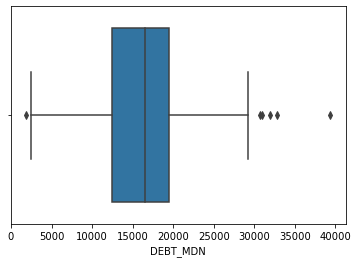

In [88]:
# Get boxplot
sns.boxplot(x = private['DEBT_MDN'])

In [89]:
# Get IQR
IQR = private['DEBT_MDN'].quantile(0.75) - private['DEBT_MDN'].quantile(0.25)

In [90]:
# Get low outlier
private[private['DEBT_MDN'] < (private['DEBT_MDN'].quantile(0.25) - 1.5*IQR)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
1653,446163,Community Christian College,Redlands,CA,92374-2893,8,13.0,13942.0,11972.0,1834.0,24413.65625,NaN,NaN,75.0,NaN,0.16,Lower cost


In [91]:
# Get low outlier by 3 st. dev. away
private[private['DEBT_MDN'] < (private['DEBT_MDN'].median() - private['DEBT_MDN'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY


In [92]:
# Get high outliers
private[private['DEBT_MDN'] > (private['DEBT_MDN'].quantile(0.75) + 1.5*IQR)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
524,164872,Boston Architectural College,Boston,MA,02115-2703,1,11.0,33031.0,27473.0,31000.0,44319.928571,NaN,NaN,271.0,0.6667,0.3321,Middle cost
1245,219505,American Baptist College,Nashville,TN,37207-9980,5,11.0,25136.0,22343.0,32000.0,21528.662338,NaN,NaN,123.0,0.6667,0.0163,Middle cost
1550,417752,Messenger College,Bedford,TX,76021-4202,6,21.0,22262.0,17190.0,30750.0,41289.918033,0.2727,NaN,45.0,0.7027,0.6444,Middle cost
1612,441511,Apex School of Theology,Durham,NC,27703,5,11.0,12120.0,10505.0,32768.0,17501.496333,NaN,NaN,389.0,0.7851,0.0308,Lower cost
1667,449348,Huntsville Bible College,Huntsville,AL,35811-1632,5,12.0,8490.0,5530.0,39375.0,14876.014085,NaN,NaN,105.0,0.5000,0.0190,Lower cost


In [93]:
# Get high outliers by 3 st. dev. away
private[private['DEBT_MDN'] > (private['DEBT_MDN'].median() + private['DEBT_MDN'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
1245,219505,American Baptist College,Nashville,TN,37207-9980,5,11.0,25136.0,22343.0,32000.0,21528.662338,NaN,NaN,123.0,0.6667,0.0163,Middle cost
1612,441511,Apex School of Theology,Durham,NC,27703,5,11.0,12120.0,10505.0,32768.0,17501.496333,NaN,NaN,389.0,0.7851,0.0308,Lower cost
1667,449348,Huntsville Bible College,Huntsville,AL,35811-1632,5,12.0,8490.0,5530.0,39375.0,14876.014085,NaN,NaN,105.0,0.5000,0.0190,Lower cost


In [94]:
# Remove those three outliers
private = private[private['DEBT_MDN'] <= (private['DEBT_MDN'].median() + private['DEBT_MDN'].std()*3)]

In [95]:
# Get new shape
private.shape

(1420, 17)

## 06. Average family income

In [96]:
# Get number of missing values for average family income
private['FAMINC'].isnull().sum()

37

In [97]:
# Show rows with missing values
private[private['FAMINC'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
167,128586,Bais Binyomin Academy,Monsey,NY,10952,2,21.0,25840.0,18671.0,16500.0,NaN,0.8182,NaN,34.0,0.5676,0.9706,Middle cost
686,177816,Kenrick Glennon Seminary,Saint Louis,MO,63119-4399,4,21.0,37890.0,34320.0,16500.0,NaN,0.7500,NaN,46.0,0.8710,0.9565,Middle cost
789,189264,Beth Hatalmud Rabbinical College,Brooklyn,NY,11214-2594,2,11.0,14300.0,5800.0,16500.0,NaN,NaN,NaN,6.0,0.5000,1.0000,Lower cost
814,190752,Yeshiva of Far Rockaway Derech Ayson Rabbinica...,Far Rockaway,NY,11691-5219,2,11.0,22250.0,12572.0,16500.0,NaN,0.8333,NaN,33.0,0.8095,1.0000,Middle cost
855,193380,Montefiore School of Nursing,Mount Vernon,NY,10550-2009,2,21.0,23076.0,20953.0,11786.0,NaN,NaN,NaN,148.0,NaN,0.1081,Middle cost
901,195562,St. Joseph's College-Long Island,Patchogue,NY,11772,2,21.0,33084.0,19226.0,17708.0,NaN,0.7667,1119.0,3120.0,0.8020,0.6462,Middle cost
908,196440,Talmudical Institute of Upstate New York,Rochester,NY,14607-3046,2,12.0,11600.0,1937.0,16500.0,NaN,NaN,NaN,6.0,0.6667,1.0000,Lower cost
927,197692,Yeshiva Shaar Hatorah,Kew Gardens,NY,11418,2,11.0,17855.0,5220.0,16500.0,NaN,0.8056,NaN,69.0,0.9375,1.0000,Lower cost
1064,209241,Mount Angel Seminary,Saint Benedict,OR,97373-0505,8,31.0,36622.0,25952.0,16500.0,NaN,1.0000,NaN,40.0,0.8636,0.2500,Middle cost
1527,392354,School of Professional Horticulture New York B...,Bronx,NY,10458-5126,2,11.0,34200.0,26635.0,16500.0,NaN,NaN,NaN,20.0,NaN,0.8500,Middle cost


In [98]:
# Get descriptive stats
private['FAMINC'].describe()

count      1383.000000
mean      60073.666621
std       29286.106921
min        4157.996466
25%       38558.185660
50%       58552.449809
75%       78781.471967
max      145228.221830
Name: FAMINC, dtype: float64

In [99]:
# Impute median for missing values
private['FAMINC'].fillna(58552.45, inplace = True)

In [100]:
# Check no missing values remain
private['FAMINC'].isnull().sum()

0

<AxesSubplot:xlabel='FAMINC'>

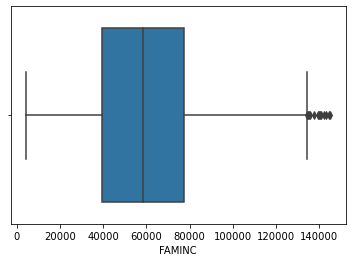

In [101]:
# Get boxplot
sns.boxplot(x = private['FAMINC'])

In [102]:
# Get descriptive stats
private['FAMINC'].describe()

count      1420.000000
mean      60034.029287
std       28902.788437
min        4157.996466
25%       39363.437150
50%       58552.450000
75%       77399.293677
max      145228.221830
Name: FAMINC, dtype: float64

In [103]:
# Get IQR
IQR = private['FAMINC'].quantile(0.75) - private['FAMINC'].quantile(0.25)

In [104]:
# Get outliers
private[private['FAMINC'] > (private['FAMINC'].quantile(0.75) + 1.5*IQR)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
171,129242,Fairfield University,Fairfield,CT,06824-5195,1,21.0,63771.0,39676.0,24787.0,139934.31500,0.6030,NaN,4103.0,0.9034,0.7724,Higher cost
743,183239,Saint Anselm College,Manchester,NH,03102-1310,1,22.0,56405.0,32023.0,27000.0,134803.11772,0.7664,1223.0,2016.0,0.9003,0.8710,Higher cost
818,191241,Fordham University,Bronx,NY,10458,2,11.0,67393.0,36301.0,22000.0,136012.43669,0.4602,1354.0,9392.0,0.9044,0.5626,Higher cost
921,197221,Webb Institute,Glen Cove,NY,11542-1398,2,21.0,69075.0,18816.0,19500.0,135141.56250,0.3333,1476.0,104.0,0.9630,0.8077,Higher cost
941,198516,Elon University,Elon,NC,27244-2010,5,22.0,49493.0,35160.0,19500.0,142286.66811,0.7214,1265.0,6196.0,0.8963,0.7952,Middle cost
946,198695,High Point University,High Point,NC,27268,5,12.0,50740.0,38877.0,19500.0,140274.14067,0.7695,1184.0,4498.0,0.8028,0.7777,Middle cost
997,202480,University of Dayton,Dayton,OH,45469,3,12.0,57680.0,31187.0,21000.0,134620.54735,0.7154,1263.0,8508.0,0.9064,0.7898,Higher cost
1009,203535,Kenyon College,Gambier,OH,43022,3,32.0,69230.0,28961.0,16250.0,137787.54494,0.3583,1395.0,1719.0,0.9213,0.7027,Higher cost
1090,211291,Bucknell University,Lewisburg,PA,17837,2,32.0,70125.0,39294.0,22269.0,143224.74963,0.3304,1353.0,3583.0,0.9319,0.7245,Higher cost
1128,213385,Lafayette College,Easton,PA,18042-1768,2,21.0,68640.0,29884.0,19000.0,141097.93562,0.2939,1351.0,2616.0,0.9398,0.6590,Higher cost


In [105]:
# Get high outliers by 3 st. dev. away
private[private['FAMINC'] > (private['FAMINC'].median() + private['FAMINC'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY


In [106]:
# Check shape
private.shape

(1420, 17)

## 07. Admissions rate

In [107]:
# Get number of missing values for admissions rate
private['ADM_RATE'].isnull().sum()

280

That's about 20% of the data set, so I will ignore them for now.

<AxesSubplot:xlabel='ADM_RATE'>

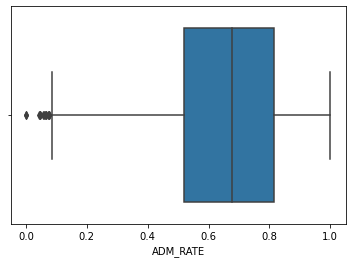

In [108]:
# Get boxplot 
sns.boxplot(x = private['ADM_RATE'])

In [109]:
# Get descriptive stats
private['ADM_RATE'].describe()

count    1140.000000
mean        0.652845
std         0.220428
min         0.000000
25%         0.520925
50%         0.677450
75%         0.815550
max         1.000000
Name: ADM_RATE, dtype: float64

In [110]:
# Get IQR
IQR = private['ADM_RATE'].quantile(0.75) - private['ADM_RATE'].quantile(0.25)

In [111]:
# Get outliers
private[private['ADM_RATE'] < (private['ADM_RATE'].quantile(0.25) - 1.5*IQR)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
51,110404,California Institute of Technology,Pasadena,CA,91125,8,12.0,68901.0,23820.0,8013.0,74238.771739,0.0662,1566.0,948.0,0.9809,0.2711,Higher cost
117,121345,Pomona College,Claremont,CA,91711-6319,8,21.0,69725.0,13622.0,9915.0,67046.898113,0.0761,1468.0,1549.0,0.9745,0.3422,Higher cost
183,130794,Yale University,New Haven,CT,06520,1,12.0,71290.0,18770.0,12265.0,80258.132695,0.0635,1517.0,5963.0,0.9919,0.4231,Higher cost
289,144050,University of Chicago,Chicago,IL,60637,3,11.0,75735.0,26160.0,15000.0,100617.131960,0.0726,1520.0,6600.0,0.9883,0.3930,Higher cost
545,166027,Harvard University,Cambridge,MA,02138,1,12.0,71135.0,15561.0,12500.0,62458.193846,0.0473,1520.0,7582.0,0.9871,0.4054,Higher cost
554,166683,Massachusetts Institute of Technology,Cambridge,MA,02139-4307,1,12.0,67430.0,18278.0,10728.0,86738.816984,0.0674,1545.0,4550.0,0.9864,0.3167,Higher cost
762,186131,Princeton University,Princeton,NJ,08544-0070,2,13.0,66950.0,9749.0,9100.0,63667.640449,0.0548,1503.0,5301.0,0.9805,0.4150,Higher cost
804,190150,Columbia University in the City of New York,New York,NY,10027,2,11.0,74435.0,22637.0,19000.0,65422.500000,0.0591,1512.0,8216.0,0.9773,0.3612,Higher cost
832,192110,The Juilliard School,New York,NY,10023-6588,2,11.0,64256.0,29511.0,25000.0,100696.350520,0.0762,NaN,487.0,0.9462,0.3532,Higher cost
903,195702,Saint Elizabeth College of Nursing,Utica,NY,13501,2,13.0,25600.0,22125.0,12000.0,56315.151685,0.0000,NaN,197.0,NaN,0.8782,Middle cost


In [112]:
# Get outliers more than 3 st. dev. away
private[private['ADM_RATE'] < (private['ADM_RATE'].median() - private['ADM_RATE'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
903,195702,Saint Elizabeth College of Nursing,Utica,NY,13501,2,13.0,25600.0,22125.0,12000.0,56315.151685,0.0,NaN,197.0,NaN,0.8782,Middle cost
1711,457925,Portland Actors Conservatory,Portland,OR,97239,8,11.0,28935.0,28935.0,12000.0,19621.363636,0.0,NaN,6.0,NaN,1.0000,Middle cost


In [113]:
# Remove these two outliers
private = private[(private['ADM_RATE'] >= (private['ADM_RATE'].median() - private['ADM_RATE'].std()*3)) | (private['ADM_RATE'].isnull())]

In [114]:
# Get new shape
private.shape

(1418, 17)

## 08. Average SAT score

In [115]:
# Get number of missing values for average SAT
private['SAT_AVG'].isnull().sum()

646

That's about 45% of the data set, so I will ignore them for now.

<AxesSubplot:xlabel='SAT_AVG'>

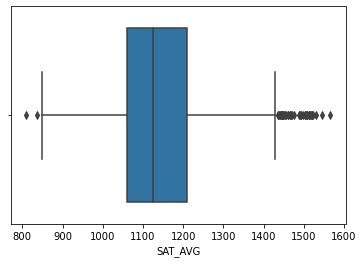

In [116]:
# Get boxplot
sns.boxplot(x = private['SAT_AVG'])

In [117]:
# Get descriptive stats
private['SAT_AVG'].describe()

count     772.000000
mean     1149.537565
std       134.709583
min       809.000000
25%      1060.750000
50%      1126.000000
75%      1209.000000
max      1566.000000
Name: SAT_AVG, dtype: float64

In [118]:
# Get IQR
IQR = private['SAT_AVG'].quantile(0.75) - private['SAT_AVG'].quantile(0.25)

In [119]:
# Show low outliers
private[private['SAT_AVG'] < (private['SAT_AVG'].quantile(0.25) - 1.5*IQR)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
315,146676,Lincoln College,Lincoln,IL,62656,3,32.0,30455.0,15393.0,10500.0,41090.869087,0.7953,809.0,960.0,0.5174,0.4042,Middle cost
1314,227429,Paul Quinn College,Dallas,TX,75241,6,11.0,18050.0,12530.0,9561.0,24616.547569,0.9009,836.0,549.0,0.6491,0.0091,Lower cost


In [120]:
# Show low outliers 3 st. dev. away
private[private['SAT_AVG'] < (private['SAT_AVG'].median() - private['SAT_AVG'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY


In [121]:
# Show high outliers
private[private['SAT_AVG'] > (private['SAT_AVG'].quantile(0.75) + 1.5*IQR)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
51,110404,California Institute of Technology,Pasadena,CA,91125,8,12.0,68901.0,23820.0,8013.0,74238.771739,0.0662,1566.0,948.0,0.9809,0.2711,Higher cost
69,112260,Claremont McKenna College,Claremont,CA,91711-6400,8,21.0,71745.0,23889.0,14375.0,97309.962441,0.0931,1446.0,1318.0,0.9643,0.4158,Higher cost
82,115409,Harvey Mudd College,Claremont,CA,91711,8,21.0,74428.0,32739.0,19984.0,123783.524510,0.1448,1531.0,886.0,0.9725,0.3138,Higher cost
117,121345,Pomona College,Claremont,CA,91711-6319,8,21.0,69725.0,13622.0,9915.0,67046.898113,0.0761,1468.0,1549.0,0.9745,0.3422,Higher cost
142,123961,University of Southern California,Los Angeles,CA,90089,8,11.0,72097.0,30453.0,17750.0,80335.792160,0.1296,1445.0,19548.0,0.9656,0.3922,Higher cost
183,130794,Yale University,New Haven,CT,06520,1,12.0,71290.0,18770.0,12265.0,80258.132695,0.0635,1517.0,5963.0,0.9919,0.4231,Higher cost
193,131496,Georgetown University,Washington,DC,20057-0001,2,11.0,71580.0,30169.0,15000.0,108786.079650,0.1452,1456.0,7089.0,0.9625,0.5201,Higher cost
247,139658,Emory University,Atlanta,GA,30322,5,11.0,66950.0,24593.0,15000.0,86143.937865,0.1852,1449.0,6975.0,0.9435,0.3960,Higher cost
289,144050,University of Chicago,Chicago,IL,60637,3,11.0,75735.0,26160.0,15000.0,100617.131960,0.0726,1520.0,6600.0,0.9883,0.3930,Higher cost
334,147767,Northwestern University,Evanston,IL,60208,3,13.0,72960.0,24840.0,14500.0,95373.666865,0.0847,1508.0,8451.0,0.9787,0.4546,Higher cost


In [122]:
# Show high outliers 3 st. dev. away
private[private['SAT_AVG'] > (private['SAT_AVG'].median() + private['SAT_AVG'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
51,110404,California Institute of Technology,Pasadena,CA,91125,8,12.0,68901.0,23820.0,8013.0,74238.771739,0.0662,1566.0,948.0,0.9809,0.2711,Higher cost
82,115409,Harvey Mudd College,Claremont,CA,91711,8,21.0,74428.0,32739.0,19984.0,123783.524510,0.1448,1531.0,886.0,0.9725,0.3138,Higher cost
554,166683,Massachusetts Institute of Technology,Cambridge,MA,02139-4307,1,12.0,67430.0,18278.0,10728.0,86738.816984,0.0674,1545.0,4550.0,0.9864,0.3167,Higher cost


In [123]:
# Remove three outliers
private = private[(private['SAT_AVG'] <= (private['SAT_AVG'].median() + private['SAT_AVG'].std()*3)) | (private['SAT_AVG'].isnull())]

In [124]:
# Check new shape
private.shape

(1415, 17)

## 09. Retention rate

In [125]:
# Get number of missing values for retention rate
private['RET_FT4_POOLED'].isnull().sum()

164

In [126]:
# Get descriptive stats
private['RET_FT4_POOLED'].describe()

count    1251.000000
mean        0.732846
std         0.147053
min         0.000000
25%         0.651950
50%         0.752700
75%         0.828950
max         1.000000
Name: RET_FT4_POOLED, dtype: float64

In [127]:
# Impute median for missing retention rate
private['RET_FT4_POOLED'].fillna(0.7527, inplace = True)

In [128]:
# Check no remaining missing values
private['RET_FT4_POOLED'].isnull().sum()

0

<AxesSubplot:xlabel='RET_FT4_POOLED'>

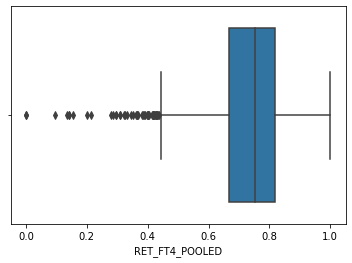

In [129]:
# Get boxplot
sns.boxplot(x = private['RET_FT4_POOLED'])

In [130]:
# Get descriptive stats
private['RET_FT4_POOLED'].describe()

count    1415.000000
mean        0.735147
std         0.138409
min         0.000000
25%         0.668150
50%         0.752700
75%         0.818100
max         1.000000
Name: RET_FT4_POOLED, dtype: float64

In [131]:
# Get IQR
IQR = private['RET_FT4_POOLED'].quantile(0.75) - private['RET_FT4_POOLED'].quantile(0.25)

In [132]:
# Get outliers
private[private['RET_FT4_POOLED'] < (private['RET_FT4_POOLED'].quantile(0.25) - 1.5*IQR)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100690,Amridge University,Montgomery,AL,36117-3553,5,12.0,17680.0,15322.0,10500.0,21079.472973,NaN,NaN,351.0,0.2143,0.2393,Lower cost
11,102058,Selma University,Selma,AL,36701,5,32.0,15822.0,13037.0,9500.0,16153.155932,NaN,NaN,304.0,0.3263,0.0197,Lower cost
25,106306,Arkansas Baptist College,Little Rock,AR,72202-6068,5,12.0,22502.0,16142.0,10707.0,20377.133714,NaN,NaN,525.0,0.3962,0.0571,Middle cost
46,110060,Bethesda University,Anaheim,CA,92801,8,11.0,17255.0,13131.0,10000.0,26031.781250,NaN,NaN,238.0,0.3798,0.0588,Lower cost
53,110918,California Christian College,Fresno,CA,93727,8,11.0,19034.0,12614.0,16500.0,29254.333333,1.0000,NaN,13.0,0.0000,0.3077,Lower cost
252,140340,Herzing University-Atlanta,Atlanta,GA,30303,5,11.0,29195.0,23045.0,12233.0,26184.228503,0.9556,NaN,694.0,0.3214,0.1023,Middle cost
293,144883,East-West University,Chicago,IL,60605,3,11.0,28640.0,17683.0,9168.0,21083.018349,NaN,NaN,394.0,0.3881,0.0279,Middle cost
347,148876,Saint Augustine College,Chicago,IL,60640-3501,3,11.0,19146.0,8702.0,3590.0,21427.859466,NaN,NaN,1076.0,0.0000,0.0121,Lower cost
372,150774,Holy Cross College,Notre Dame,IN,46556-0308,3,21.0,43289.0,24666.0,11500.0,82606.960526,0.8827,1270.0,498.0,0.4275,0.6305,Middle cost
437,155308,Kansas Christian College,Overland Park,KS,66204-1975,4,12.0,14304.0,9128.0,5500.0,25150.406780,NaN,NaN,151.0,0.3902,0.2980,Lower cost


In [133]:
# Get outliers 3 st. dev. away
private[private['RET_FT4_POOLED'] < (private['RET_FT4_POOLED'].median() - private['RET_FT4_POOLED'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100690,Amridge University,Montgomery,AL,36117-3553,5,12.0,17680.0,15322.0,10500.0,21079.472973,NaN,NaN,351.0,0.2143,0.2393,Lower cost
11,102058,Selma University,Selma,AL,36701,5,32.0,15822.0,13037.0,9500.0,16153.155932,NaN,NaN,304.0,0.3263,0.0197,Lower cost
53,110918,California Christian College,Fresno,CA,93727,8,11.0,19034.0,12614.0,16500.0,29254.333333,1.0000,NaN,13.0,0.0000,0.3077,Lower cost
252,140340,Herzing University-Atlanta,Atlanta,GA,30303,5,11.0,29195.0,23045.0,12233.0,26184.228503,0.9556,NaN,694.0,0.3214,0.1023,Middle cost
347,148876,Saint Augustine College,Chicago,IL,60640-3501,3,11.0,19146.0,8702.0,3590.0,21427.859466,NaN,NaN,1076.0,0.0000,0.0121,Lower cost
689,177986,Logan University,Chesterfield,MO,63017,4,21.0,18068.0,14239.0,6333.0,39966.581197,0.8837,NaN,179.0,0.2857,0.5810,Lower cost
785,188942,Associated Beth Rivkah Schools,Brooklyn,NY,11225-0000,2,11.0,19320.0,13243.0,16500.0,31114.666667,0.9701,NaN,195.0,0.3333,0.9231,Lower cost
881,194763,Rabbinical Seminary of America,Flushing,NY,11367,2,11.0,19100.0,6044.0,16500.0,41886.473684,0.9873,NaN,267.0,0.1534,1.0000,Lower cost
910,196583,Torah Temimah Talmudical Seminary,Brooklyn,NY,11218,2,11.0,17230.0,12094.0,16500.0,32471.588235,0.8000,NaN,21.0,0.1351,0.9524,Lower cost
1049,206817,Bacone College,Muskogee,OK,74403-1597,6,32.0,32800.0,20689.0,11000.0,33762.645314,0.1524,914.0,271.0,0.2791,0.1697,Middle cost


In [134]:
# Remove observations with retention rate below 0.3
private = private[private['RET_FT4_POOLED'] >= 0.3]

In [135]:
# Get new shape
private.shape

(1402, 17)

## 10. Percent of white students

In [136]:
# Get number of missing values for percent white students
private['UGDS_WHITE'].isnull().sum()

0

<AxesSubplot:xlabel='UGDS_WHITE'>

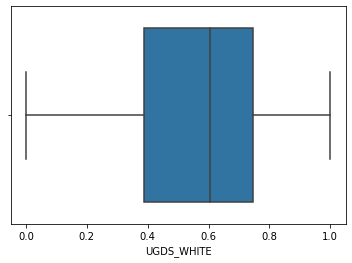

In [137]:
# Get boxplot
sns.boxplot(x = private['UGDS_WHITE'])

## 11. Fixing cost_category

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='COSTT4_A', ylabel='Density'>

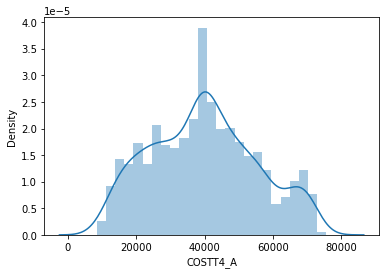

In [138]:
# Get histogram of average cost of attendance
sns.distplot(private['COSTT4_A'], bins = 25)

In [139]:
# Update lower cost category
private.loc[private['COSTT4_A'] < 25000, 'COST_CATEGORY'] = 'Lower cost'

In [140]:
# Update middle cost category
private.loc[(private['COSTT4_A'] >= 25000) & (private['COSTT4_A'] < 55000), 'COST_CATEGORY'] = 'Middle cost'

In [141]:
# Update higher cost category
private.loc[private['COSTT4_A'] >= 55000, 'COST_CATEGORY'] = 'Higher cost'

In [142]:
# Get value counts of COST_CATEGORY column
private['COST_CATEGORY'].value_counts(dropna = False)

Middle cost    872
Lower cost     282
Higher cost    248
Name: COST_CATEGORY, dtype: int64

# 04. Exporting private dataset

In [143]:
# Reset index for private
private = private.reset_index(drop = True)

In [144]:
# Check output
private.tail()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
1397,491710,Yeshiva Gedolah of Cliffwood,Keyport,NJ,07735-5105,2,21.0,14150.0,7150.0,16500.0,58552.45,0.5854,NaN,84.0,0.9500,1.0000,Lower cost
1398,491765,Yeshivas Emek Hatorah,Howell,NJ,07731-2444,2,21.0,27190.0,20141.0,16500.0,58552.45,NaN,NaN,46.0,0.7527,1.0000,Middle cost
1399,491817,Seminary Bnos Chaim,Lakewood,NJ,08701-2336,2,13.0,19886.0,14145.0,16500.0,58552.45,0.8056,NaN,159.0,0.7527,1.0000,Lower cost
1400,492801,Drury University-College of Continuing Profess...,Springfield,MO,65802,4,12.0,19707.0,14368.0,13275.0,58552.45,NaN,NaN,1419.0,0.7568,0.8168,Lower cost
1401,492962,Indiana Institute of Technology-College of Pro...,Fort Wayne,IN,46803,3,11.0,20329.0,14061.0,11919.0,58552.45,NaN,NaN,4456.0,0.5987,0.4165,Lower cost


In [145]:
# Get final shape
private.shape

(1402, 17)

In [146]:
# Get final info
private.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNITID          1402 non-null   int64  
 1   NAME            1402 non-null   object 
 2   CITY            1402 non-null   object 
 3   STATE           1402 non-null   object 
 4   ZIP             1402 non-null   object 
 5   REGION          1402 non-null   int64  
 6   LOCALE          1402 non-null   float64
 7   COSTT4_A        1402 non-null   float64
 8   NPT4_PRIV       1402 non-null   float64
 9   DEBT_MDN        1402 non-null   float64
 10  FAMINC          1402 non-null   float64
 11  ADM_RATE        1128 non-null   float64
 12  SAT_AVG         768 non-null    float64
 13  UGDS            1402 non-null   float64
 14  RET_FT4_POOLED  1402 non-null   float64
 15  UGDS_WHITE      1402 non-null   float64
 16  COST_CATEGORY   1402 non-null   object 
dtypes: float64(10), int64(2), object(

In [147]:
# Get final descriptive stats
private.describe()

,UNITID,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE
count,1402.000000,1402.000000,1402.000000,1402.000000,1402.000000,1402.000000,1402.000000,1128.000000,768.000000,1402.000000,1402.000000,1402.000000
mean,223536.764622,4.076320,19.640514,39795.671897,21530.216833,16126.438659,60223.963863,0.655590,1148.290365,1703.609130,0.740364,0.550499
std,103525.852135,2.196102,9.564717,15521.879916,8014.165798,4921.431789,28882.803801,0.216308,132.467635,2250.664299,0.127590,0.268305
min,100937.000000,1.000000,11.000000,8415.000000,1466.000000,1834.000000,4157.996466,0.043600,809.000000,6.000000,0.307700,0.000000
25%,157416.500000,2.000000,11.000000,27587.500000,17010.750000,12500.000000,39702.659864,0.523900,1060.750000,328.250000,0.672425,0.387575
50%,196516.000000,4.000000,21.000000,39509.000000,21429.500000,16500.000000,58552.450000,0.678300,1126.000000,1036.500000,0.752700,0.604100
75%,228881.750000,5.000000,22.000000,50347.500000,26096.000000,19500.000000,77650.753027,0.815550,1206.250000,2041.000000,0.818700,0.744550
max,492962.000000,9.000000,43.000000,75735.000000,45952.000000,31000.000000,145228.221830,1.000000,1522.000000,19548.000000,1.000000,1.000000


In [148]:
# Export private dataset as pickle file
private.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'private_data.pkl'))

In [149]:
# Export as csv
private.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'private_data.csv'))